# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import pprint
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/ec2-user/traffic-signs-data/train.p'
testing_file = '/home/ec2-user/traffic-signs-data/test.p'
signnames_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signnames_file, mode='r') as f:
    sign_dict = {}
    sign_reader = csv.reader(f, delimiter=',')
    for row in sign_reader:
        sign_dict[row[0]] = row[1]
    print(pprint.pformat(sign_dict))
    
X_train, X_val, y_train, y_val = train_test_split(train['features'], train['labels'], test_size=0.33, random_state=0)
X_test, y_test = test['features'], test['labels']

{'0': 'Speed limit (20km/h)',
 '1': 'Speed limit (30km/h)',
 '10': 'No passing for vechiles over 3.5 metric tons',
 '11': 'Right-of-way at the next intersection',
 '12': 'Priority road',
 '13': 'Yield',
 '14': 'Stop',
 '15': 'No vechiles',
 '16': 'Vechiles over 3.5 metric tons prohibited',
 '17': 'No entry',
 '18': 'General caution',
 '19': 'Dangerous curve to the left',
 '2': 'Speed limit (50km/h)',
 '20': 'Dangerous curve to the right',
 '21': 'Double curve',
 '22': 'Bumpy road',
 '23': 'Slippery road',
 '24': 'Road narrows on the right',
 '25': 'Road work',
 '26': 'Traffic signals',
 '27': 'Pedestrians',
 '28': 'Children crossing',
 '29': 'Bicycles crossing',
 '3': 'Speed limit (60km/h)',
 '30': 'Beware of ice/snow',
 '31': 'Wild animals crossing',
 '32': 'End of all speed and passing limits',
 '33': 'Turn right ahead',
 '34': 'Turn left ahead',
 '35': 'Ahead only',
 '36': 'Go straight or right',
 '37': 'Go straight or left',
 '38': 'Keep right',
 '39': 'Keep left',
 '4': 'Speed lim

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)
n_validation = len(X_val)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 26270
Number of validation examples = 12939
Number of testing examples = 12630
Image data shape = (26270, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

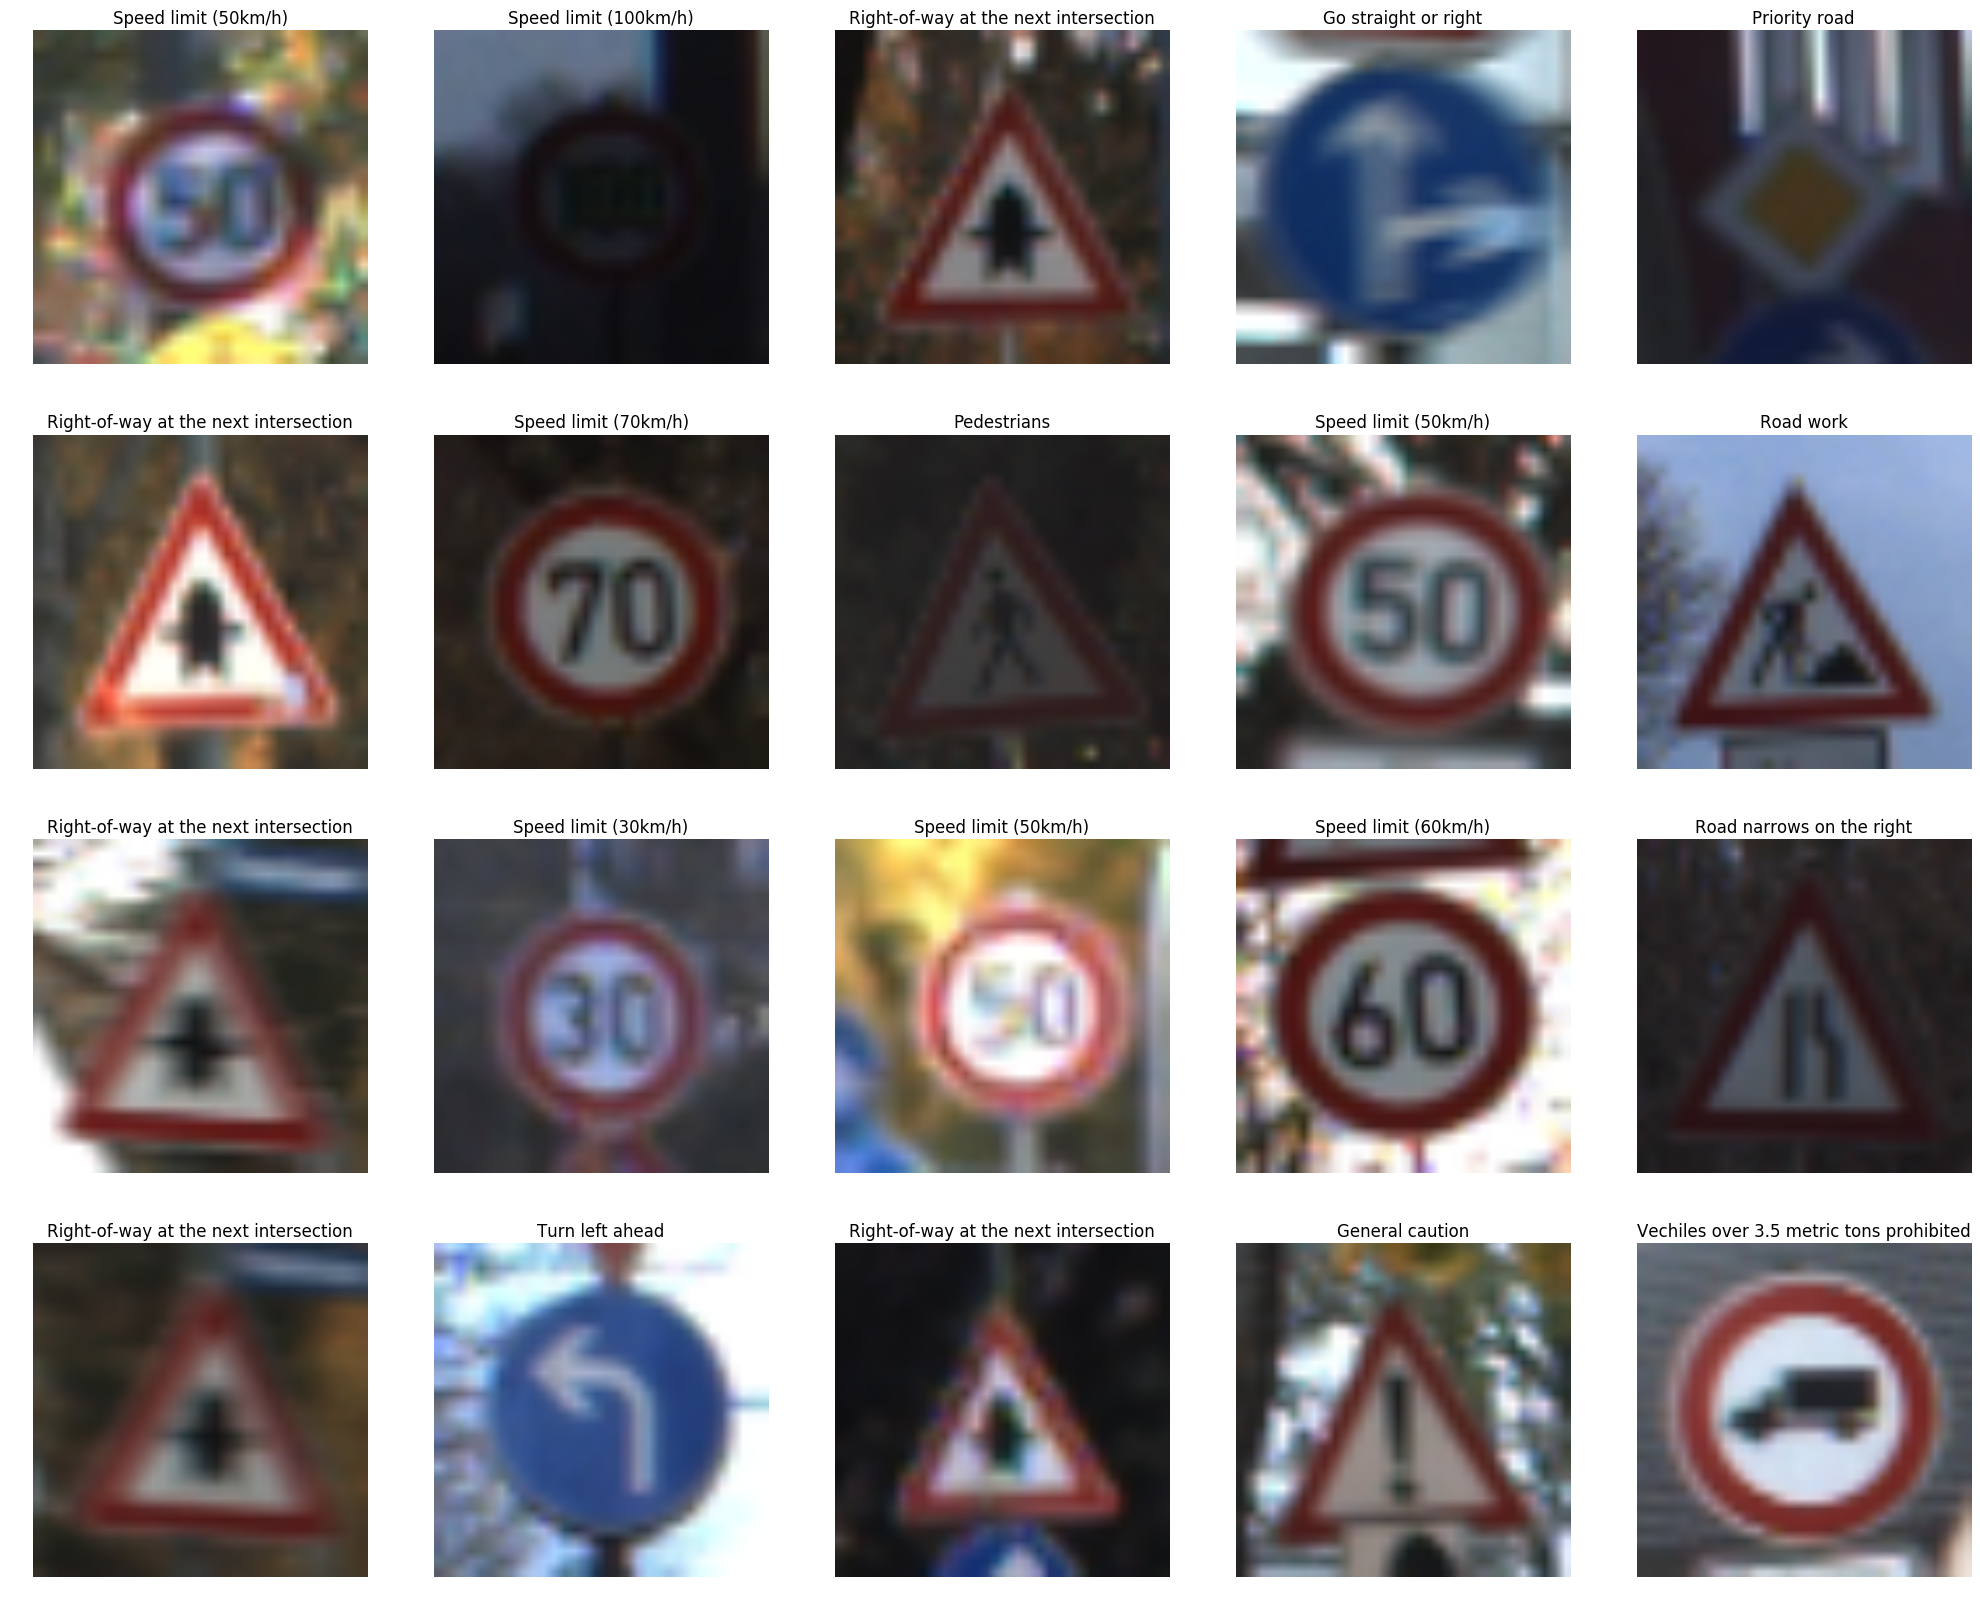

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# Show some sample images and their labels
plt.figure(figsize=(25, 20))

for i in range(20):
    ind, image = random.choice(list(enumerate(X_train)))
    label_name = sign_dict[str(y_train[ind])]
    plt.subplot(4, 5, i+1)
    #plt.title(label_name)
    plt.imshow(image)
    plt.title(label_name)
    plt.axis('off')
plt.show()

In [4]:
# Data Visualization continued
# Bar Plot of the Labels and their count in the dataset
def bar_plot(dataset, plot_title):
    plt.figure(figsize=(30, 10))
    unique_labels_counts = np.unique(dataset, return_counts=True)
    x_axis_labels = unique_labels_counts[0]
    y_axis_labels = unique_labels_counts[1]
    y_pos = np.arange(len(x_axis_labels))
    #print('Labels and their counts in Training data')
    #pprint.pprint(dict(zip(x_axis_labels, y_axis_labels)), width=1)
    plt.bar(y_pos, y_axis_labels, align='center', alpha=0.5)
    plt.xticks(y_pos, x_axis_labels, fontsize=20)
    plt.ylabel('Label Count', fontsize=30)
    plt.title(plot_title, fontsize=30) 
    plt.show()

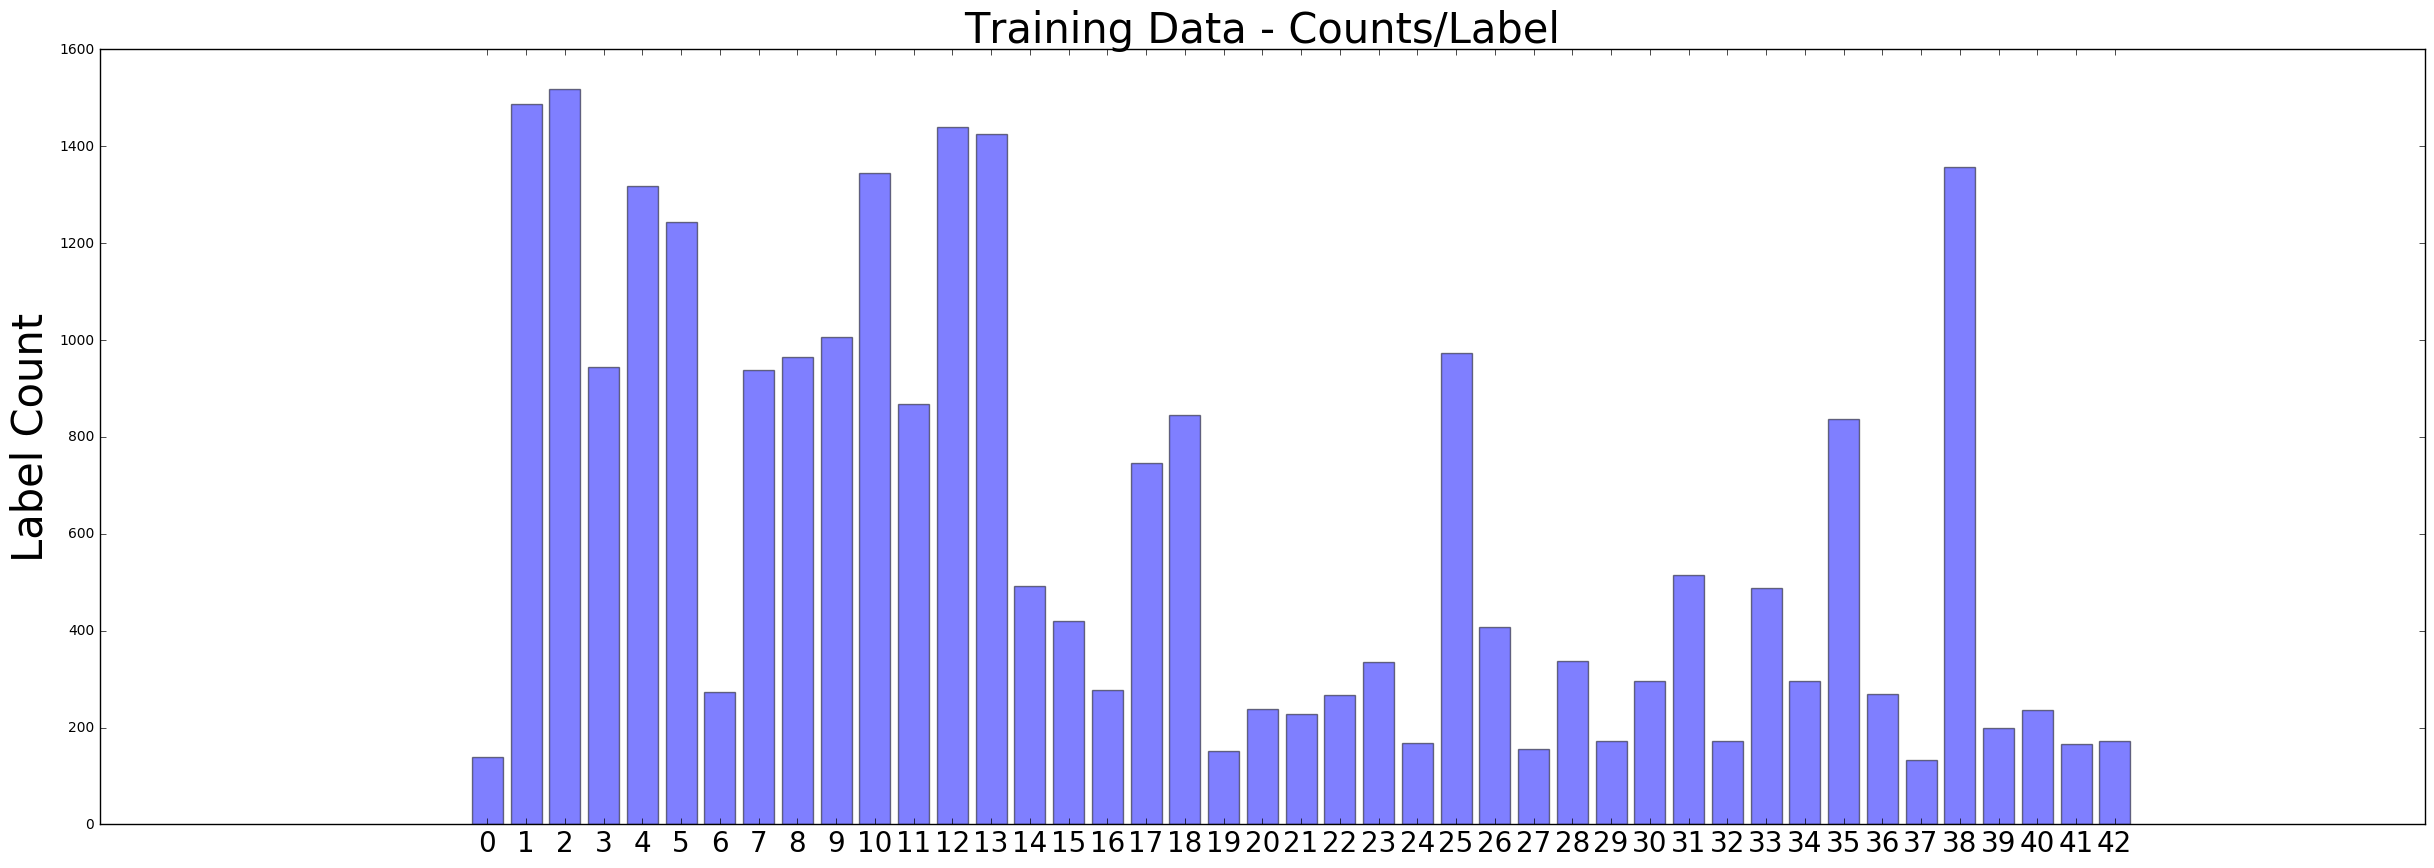

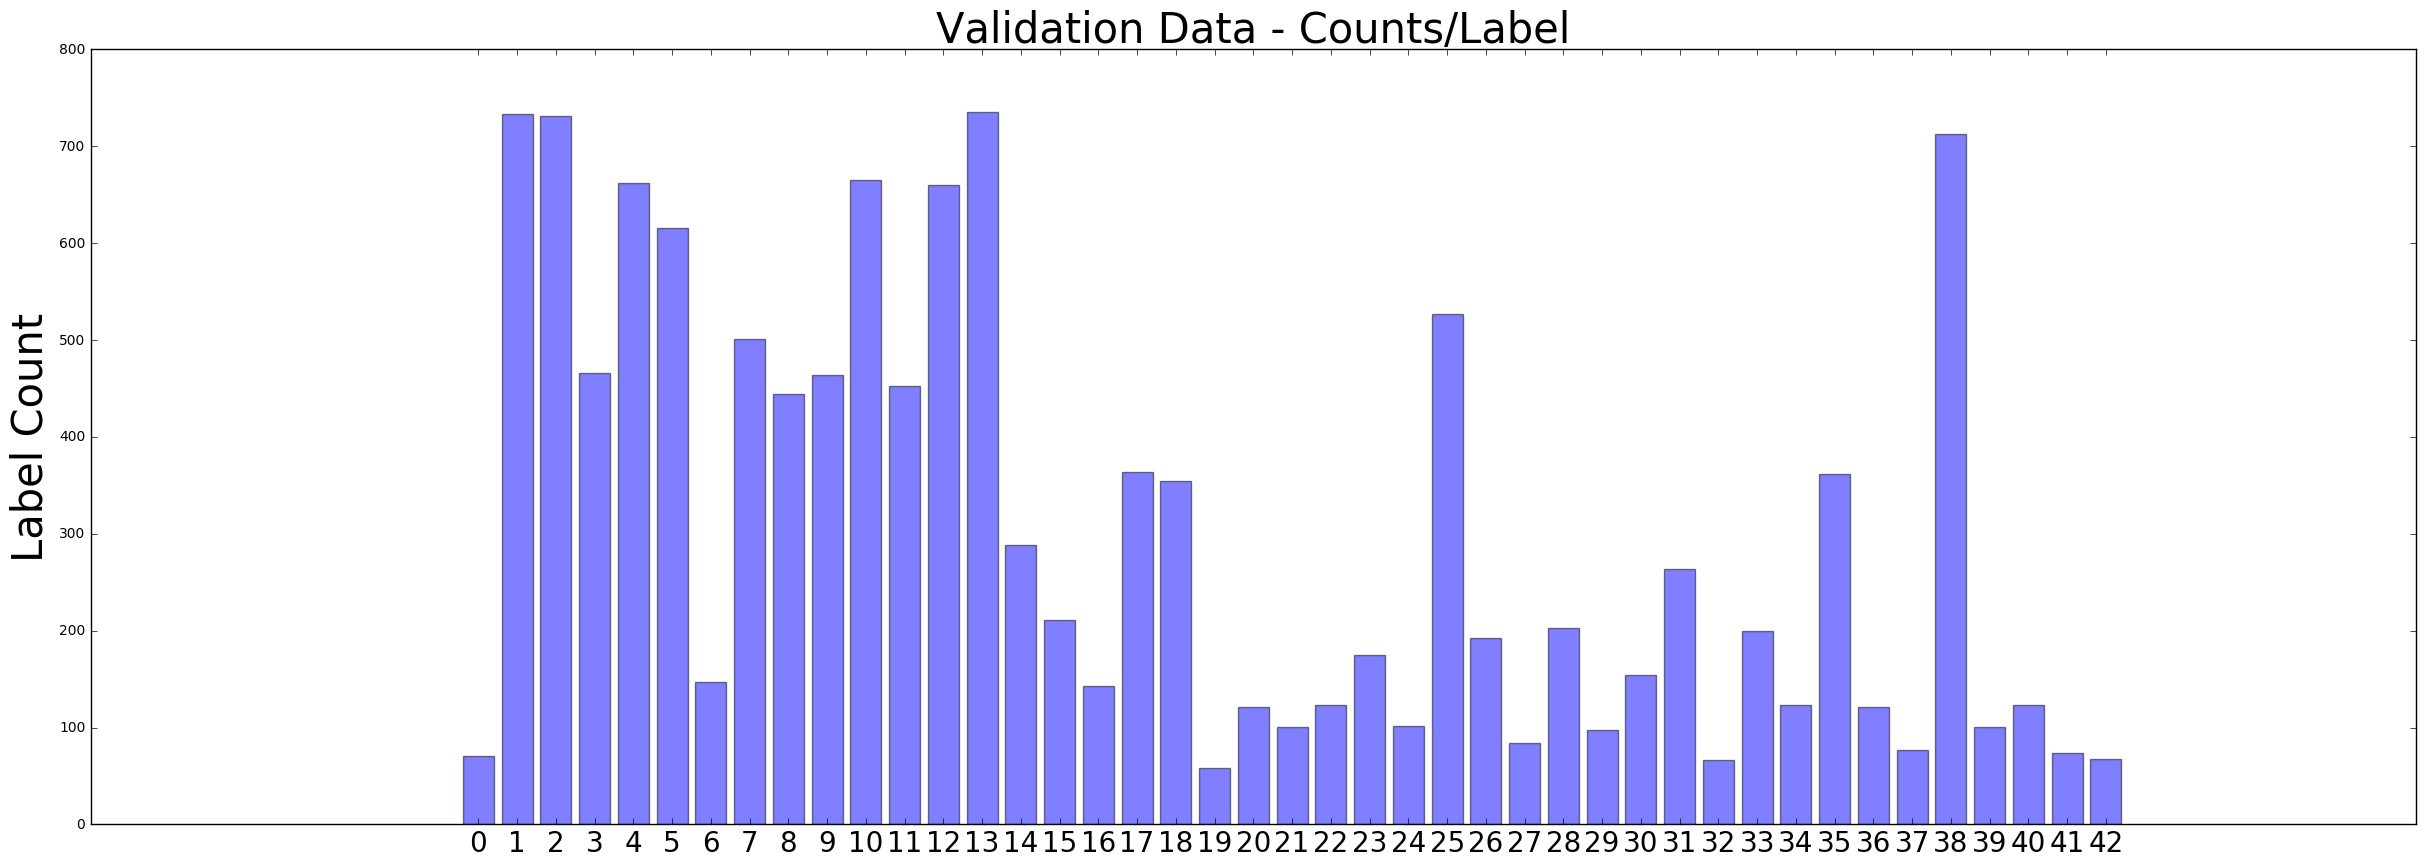

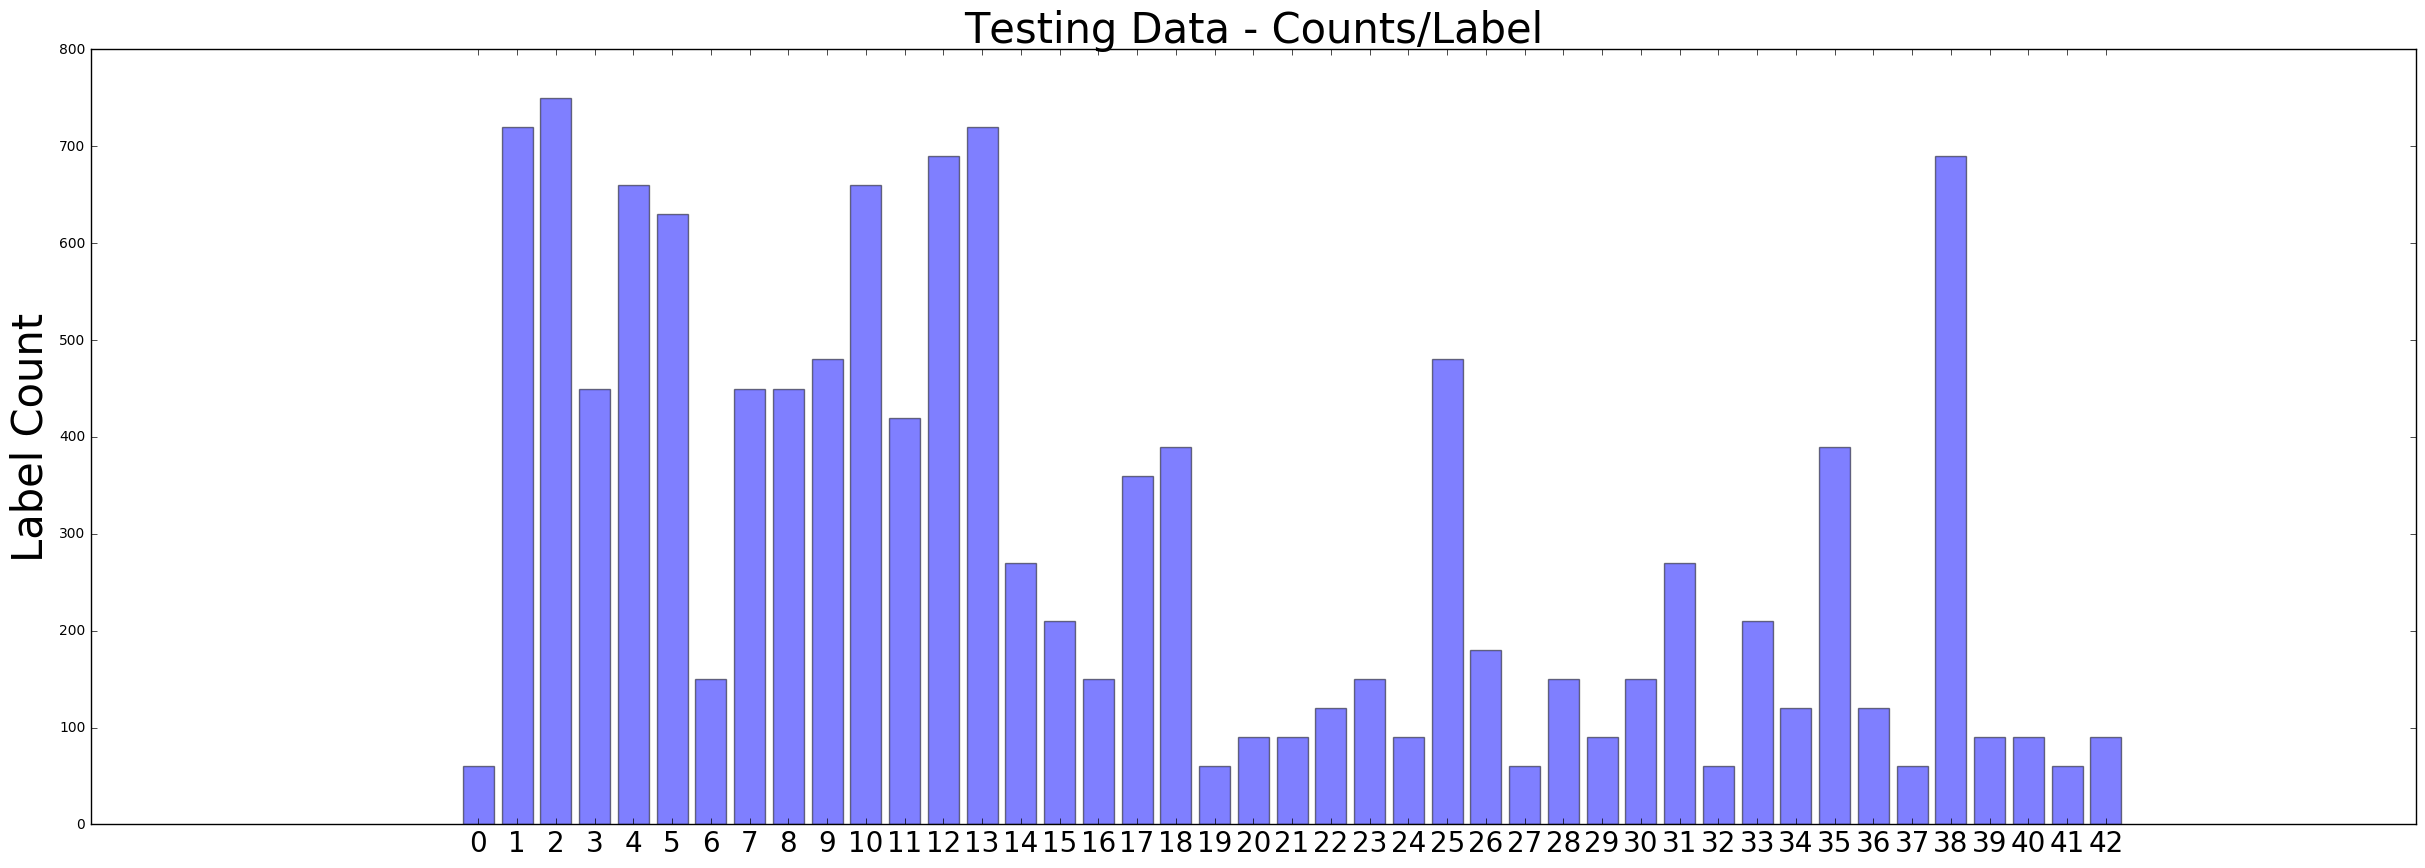

In [5]:
# Bar Plot of the Labels and their count in the dataset
bar_plot(dataset=y_train, plot_title='Training Data - Counts/Label')
bar_plot(dataset=y_val, plot_title='Validation Data - Counts/Label')
bar_plot(dataset=y_test, plot_title='Testing Data - Counts/Label')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.preprocessing import LabelBinarizer

'''
# Convert color to grayscale. Moving this code to inside a TF Session
print(type(X_train))
X_train = tf.image.rgb_to_grayscale(X_train, name=None)
X_test = tf.image.rgb_to_grayscale(X_test, name=None)
print(type(X_train.eval()))
'''

# One Hot Encoding on the labels
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

encoder = LabelBinarizer()
encoder.fit(y_val)
y_val = encoder.transform(y_val)

encoder = LabelBinarizer()
encoder.fit(y_test)
y_test = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  
1. One Hot Encoding - Convert the Labels of Training and Test data into One Hot encoded vectors
2. RGB to Grayscale - Convert the RGB Images to Grayscale. Grayscale seems to be computationally less expensive.

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  
1. Used train_test_split method of scikit-learn to split the training set into train(75%) and validation(25%) datasets  

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
image_size = 32
num_labels = 43
num_channels = 1 # grayscale

batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])


graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(
        tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_validation_dataset = tf.placeholder(
        tf.float32, shape=(n_validation, image_size, image_size, num_channels))
    tf_test_dataset = tf.placeholder(
        tf.float32, shape=(len(X_test), image_size, image_size, num_channels))
    tf_new_test_dataset = tf.placeholder(
        tf.float32, shape=(1, image_size, image_size, num_channels))


    # Variables.

    #CNN Layer_1: 5x5x1x16
    layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth]))

    #CNN Layer_2: 5x5x16x16
    layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    
    #Layer_3: MatMul
    layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    
    #Layer_4: MatMul
    layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))

    # Model.
    def model(data):
        #data = tf.reshape(data, (-1, 32, 32, num_channels))
        conv = tf.nn.conv2d(data, layer1_weights, strides=[1, 2, 2, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer1_biases)
        conv = tf.nn.conv2d(hidden, layer2_weights, strides=[1, 2, 2, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer2_biases)
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        return tf.matmul(hidden, layer4_weights) + layer4_biases

    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    validation_logits = model(tf_validation_dataset)
    test_logits = model(tf_test_dataset)
    new_test_logits = model(tf_new_test_dataset)

    # Optimizer.
    '''
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate=0.1
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100000, 0.96, staircase=True)
    # Passing global_step to minimize() will increment it at each step.
    optimizer = (tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step))
    '''
    #optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-01).minimize(loss)
    '''
    batch = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(0.1,batch * batch_size, 10000, 0.95, staircase=True)
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9).minimize(loss, global_step=batch_size)
    '''
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    validation_prediction = tf.nn.softmax(validation_logits)
    test_prediction = tf.nn.softmax(test_logits)
    new_test_prediction = tf.nn.softmax(new_test_logits)
    
    # convert image to grayscale
    X_train = tf.image.rgb_to_grayscale(X_train, name=None)
    X_val = tf.image.rgb_to_grayscale(X_val, name=None)
    X_test = tf.image.rgb_to_grayscale(X_test, name=None)

    init = tf.global_variables_initializer()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  
1. Type of Model: CNN
2. Layers: 4 Hidden (2 CNN + 2 MatMul)
3. Sizes:   
    batch size = 16  
    conv filter patch size = 5  
    conv filter depth = 16  
4. Optimizer: Adam Optimizer with learning rate of 0.001  

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
num_steps = 30000

session = tf.Session(graph=graph, config=tf.ConfigProto(log_device_placement=True))
_ = session.run([init])
X_train = session.run(X_train)
X_val = session.run(X_val)
X_test = session.run(X_test)
print('Initialized')
    
for step in range(num_steps):
    # Choose a random number of elements. size = batch_size.
    p = np.random.permutation(n_train)[:batch_size] # build random index
    batch_data = X_train[p] # images of training set belonging to the random index
    batch_labels = y_train[p] # labels of training set of the corresponding random images in previous step

    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, 
                 tf_validation_dataset: X_val, 
                 tf_test_dataset: X_test}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
        print('Minibatch loss at step %d: %f' % (step, l))
        print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
        #print('Validation accuracy: %.1f%%' % accuracy(
         #   valid_prediction.eval(), valid_labels))
        #if (step % 2000 == 0):
        validation_predictions = session.run(validation_prediction, feed_dict=feed_dict)
        print('Validation Set accuracy: %.1f%%' % accuracy(validation_predictions, y_val))
        print()

test_predictions = session.run(test_prediction, feed_dict=feed_dict)
print('Test Set accuracy: %.1f%%' % accuracy(test_predictions, y_test))
print()

# Pick 10 random images to see how well the model has trained on it
sample_indexes = random.sample(range(len(X_test)), 10)
sample_images = X_test[sample_indexes]
sample_labels = y_test[sample_indexes]
sample_predictions = test_predictions[sample_indexes]

print(np.argmax(sample_labels, 1))
print(np.argmax(sample_predictions, 1))
print('Sample Test Set accuracy: %.1f%%' % accuracy(sample_predictions, sample_labels))
print('Test Set accuracy: %.1f%%' % accuracy(test_predictions, y_test))

Initialized
Minibatch loss at step 0: 109.955948
Minibatch accuracy: 6.2%
Validation Set accuracy: 4.7%

Minibatch loss at step 500: 3.260349
Minibatch accuracy: 12.5%
Validation Set accuracy: 8.5%

Minibatch loss at step 1000: 3.573260
Minibatch accuracy: 12.5%
Validation Set accuracy: 22.4%

Minibatch loss at step 1500: 2.371877
Minibatch accuracy: 31.2%
Validation Set accuracy: 38.4%

Minibatch loss at step 2000: 1.578281
Minibatch accuracy: 56.2%
Validation Set accuracy: 54.5%

Minibatch loss at step 2500: 1.022787
Minibatch accuracy: 93.8%
Validation Set accuracy: 62.5%

Minibatch loss at step 3000: 1.342996
Minibatch accuracy: 62.5%
Validation Set accuracy: 68.1%

Minibatch loss at step 3500: 0.526401
Minibatch accuracy: 81.2%
Validation Set accuracy: 73.6%

Minibatch loss at step 4000: 0.681014
Minibatch accuracy: 75.0%
Validation Set accuracy: 75.2%

Minibatch loss at step 4500: 0.416392
Minibatch accuracy: 93.8%
Validation Set accuracy: 76.1%

Minibatch loss at step 5000: 1.15

In [10]:
# Test Predictions
test_predictions = session.run(test_prediction, feed_dict=feed_dict)
print('Test Set accuracy: %.1f%%' % accuracy(test_predictions, y_test))
print()

# Pick 10 random images to see how well the model has trained on it
sample_indexes = random.sample(range(len(X_test)), 10)
sample_images = X_test[sample_indexes]
sample_labels = y_test[sample_indexes]
sample_predictions = test_predictions[sample_indexes]

print(np.argmax(sample_labels, 1))
print(np.argmax(sample_predictions, 1))
print('Sample Test Set accuracy: %.1f%%' % accuracy(sample_predictions, sample_labels))
print('Full Test Set accuracy: %.1f%%' % accuracy(test_predictions, y_test))

Test Set accuracy: 85.4%

[ 5 14  8  4 25 34  2  1 17 14]
[ 5 14  8  4 31 34  2  1 17 14]
Sample Test Set accuracy: 90.0%
Full Test Set accuracy: 85.4%


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_  

**Answer:**  
1. Optimizer: GradientDescentOptimizer took a very large number of steps to converge. 
    so, replaced it with Adam Optimizer
2. batchsize: 16 (Higher batchsizes like 128 seem to take a long time to converge)
3. epochs: A total of 25,000 steps for a test set accuracy of about 88%
4. learning rate: 
    0.001 was the best.
    TODO - try exponential decay

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**  
1. Step 1: Tried a simple logistic regression. Wx + b
2. Tried CNN. Faced issues in getting it to work
3. Hacked CIFAR-10 example in TensorFlow and came up with my own GTSRB version of it. Got 92% accuracy.
https://github.com/hashkanna/tensorflow/tree/master/tensorflow/models/image/gtsrb
4. Attempted CNN again based on Udacity examples. Got it working.
5. Played around with various parameters like the batchsize and the Regularization parameter
6. TODO: Learn to use Tensorboard

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

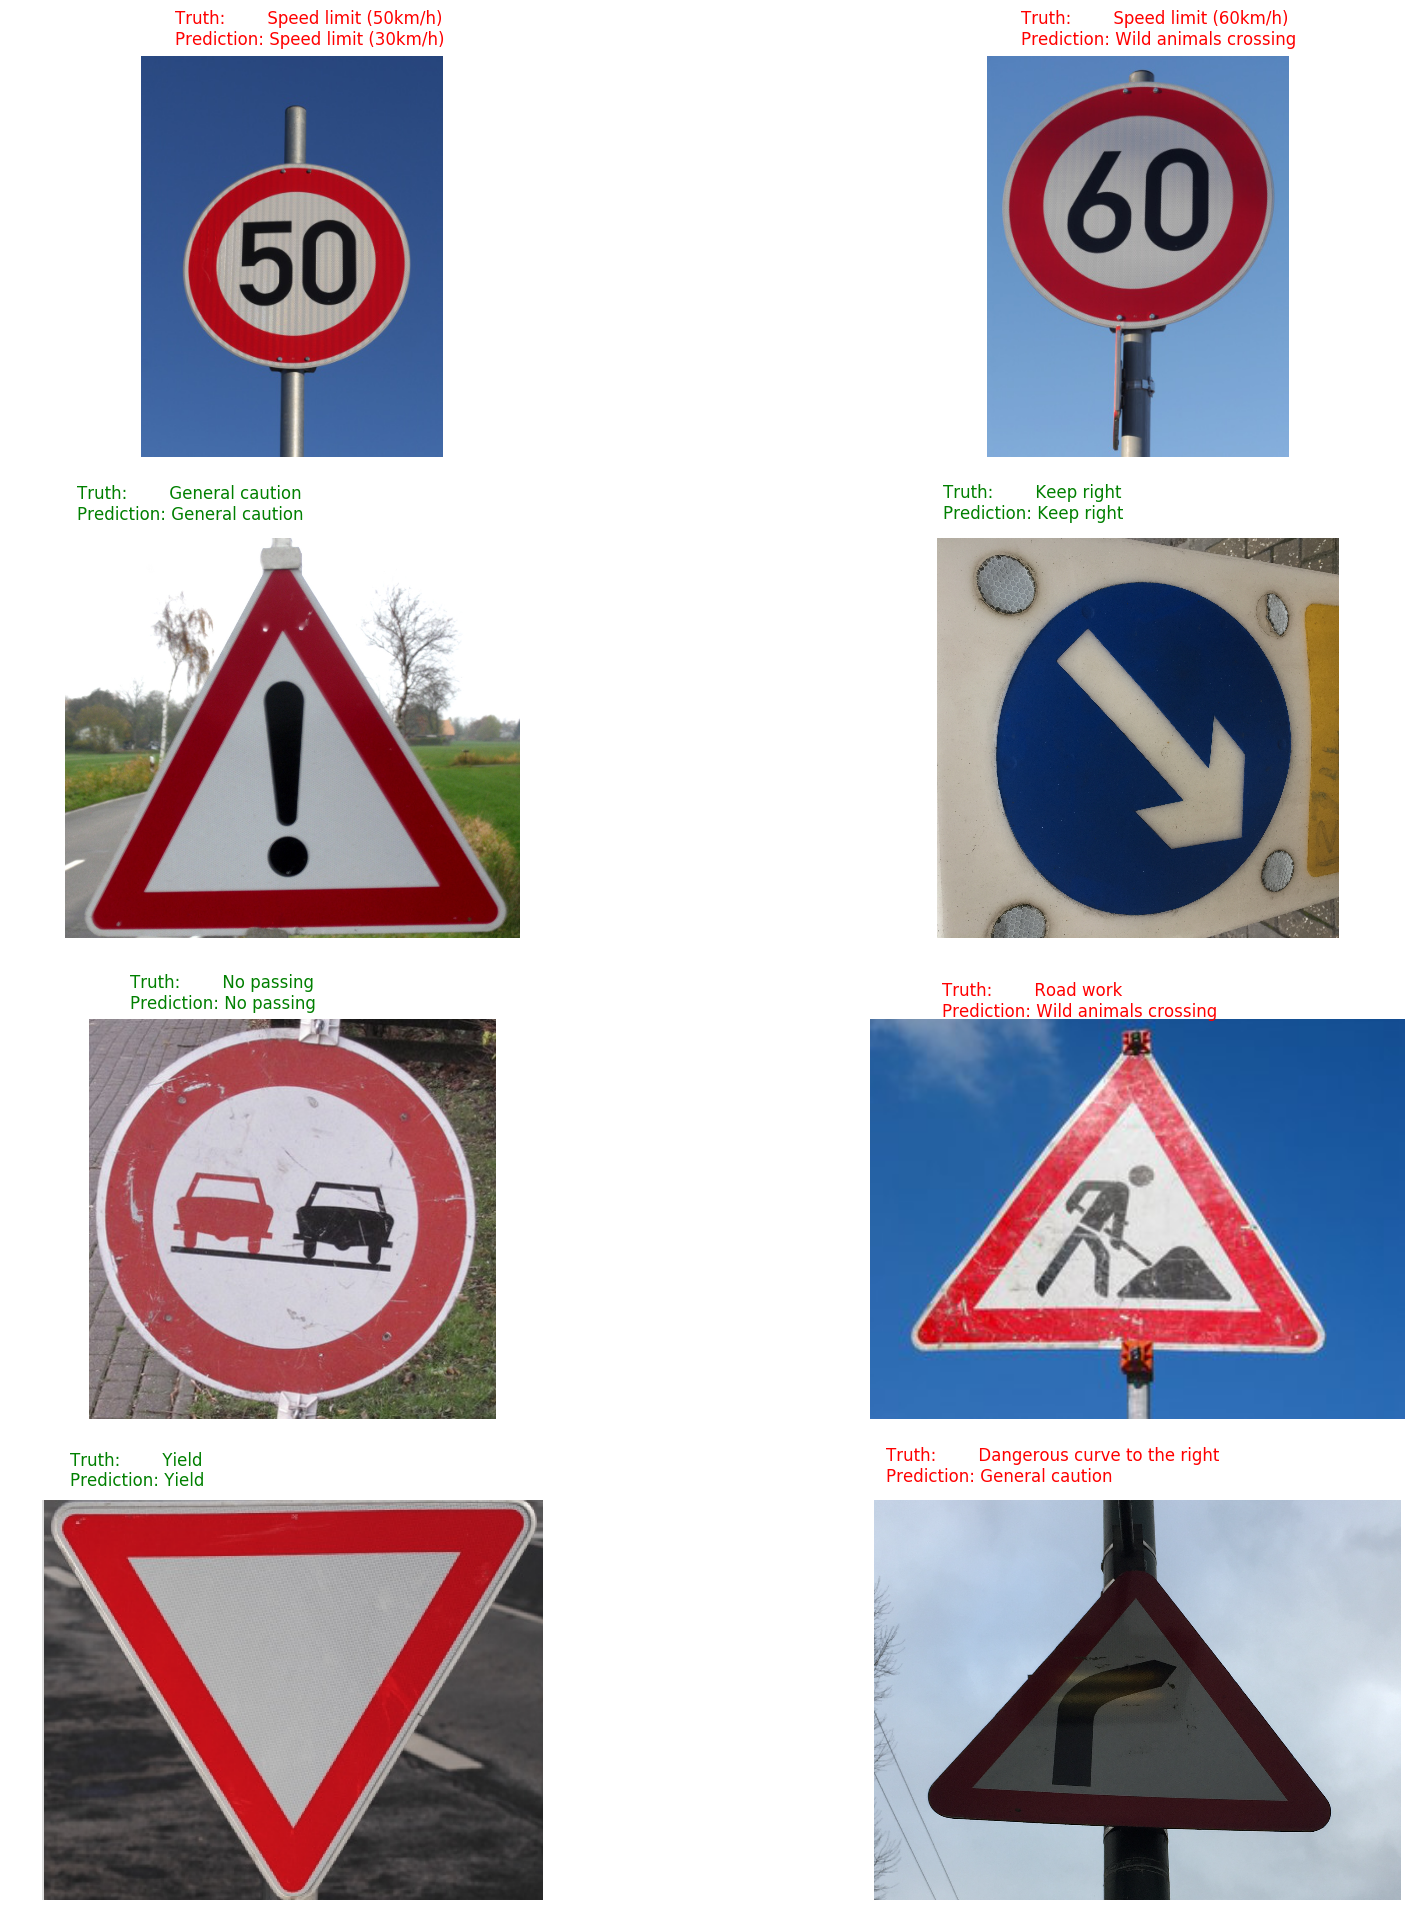

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# New example images shot from my iPhone and a few taken from the web
# Apply the model on these images to get the predicted labels
from PIL import Image
from scipy import misc
import os


new_images_folder = '/home/ec2-user/new_images/'
listing = os.listdir(new_images_folder)    
truth_labels = [2, 3, 18, 38, 9, 25, 13, 20]
fig = plt.figure(figsize=(20, 30))
for i, file in enumerate(listing):
    #print(file)
    #actual_new_image = Image.open('/home/ec2-user/new_images/test50.jpg')
    actual_new_image = Image.open(new_images_folder + file)
    new_image = actual_new_image.convert('L') #grayscale
    new_image = new_image.resize((32,32))
    new_image.load()
    new_image = np.asarray(new_image).reshape(1,32,32,1)
    #print(new_image)
    new_image_predicted_label = session.run(new_test_prediction, feed_dict={tf_new_test_dataset: new_image})
    new_predicted_label = np.argmax(new_image_predicted_label, 1)[0]
    new_predicted_label = sign_dict[str(new_predicted_label)]

    #plt.subplot(4, 5, i+1)
    #plt.title(label_name)
    plt.subplot(5, 2,1+i)
    #plt.title(label_name)
    plt.axis('off')
    truth= sign_dict[str(truth_labels[i])]
    color='green' if truth == new_predicted_label else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}\n".format(truth, new_predicted_label), 
        fontsize=12, color=color)
    plt.imshow(actual_new_image)
plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**  
1. The model works well for images I clicked on my iPhone(Keep Right image) and also on randomly downloaded images from the internet. 
2. One of the mistakes, the last one seems to be related to another sign that is quite close.
3. Not sure what went wrong with the 60km/h image. The prediction is nowhere close to the actual.

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**  
Validation Set Accuracy: 93.9%  
Test Set Accuracy: 85.4%   
4 out of 8 new images are correct. 50% accuracy.  
6 out of 8 new images are correct in the top-k=2. 75% accuracy

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#tf.nn.top_k(input, k=3, sorted=True, name=None)
def error_image_topk(img, k=3):
    error_image_1 = Image.open(new_images_folder + img)
    error_image_1 = error_image_1.convert('L').resize((32,32))
    error_image_1.load()
    error_image_1 = np.asarray(error_image_1).reshape(1,32,32,1)
    #print(error_image_1.shape)
    error_image_1_predicted_label = session.run(new_test_prediction, feed_dict={tf_new_test_dataset: error_image_1})
    error_label_indexes = (error_image_1_predicted_label[0].argsort()[-k:][::-1])
    print(img)
    print('-----------')
    for label in error_label_indexes:
        print(sign_dict[str(label)])
    print('-----------\n\n')

#print(type(error_image_1_predicted_label[0]))
#print(session.run(tf.nn.top_k(tf.constant(error_image_1_predicted_label), k=1)))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  
1. For the 60km/h image, the answer doesn't appear on the top 5. may be the image needs to be cropped
2. For the dangerous curve to the right image, the curve here in UK seems to be different. has a bigger angle, thats why it seems to fail

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [17]:
error_image_topk('test_50.jpg')
error_image_topk('test_60.jpg')
error_image_topk('test_roadwork.jpg')
error_image_topk('test_turnrightahead.jpg')

test_50.jpg
-----------
Speed limit (30km/h)
Speed limit (70km/h)
Speed limit (120km/h)
-----------


test_60.jpg
-----------
Wild animals crossing
Speed limit (120km/h)
Bicycles crossing
-----------


test_roadwork.jpg
-----------
Wild animals crossing
Road work
Bicycles crossing
-----------


test_turnrightahead.jpg
-----------
General caution
Road work
Dangerous curve to the right
-----------




In [15]:
from collections import defaultdict
def failure_rate_bylabel(predictions, labels):
    label_dict = defaultdict(int)
    for i in range(len(predictions)):
        if np.argmax(predictions[i]) == np.argmax(labels[i]):
            label_dict[str(np.argmax(labels[i]))] += 1
    total_label_dict = dict((str(x),list(test['labels']).count(x)) for x in set(test['labels']))
    for i in range(43):
        print('Label %d: %d/%d \t%f\t%s'%(i, label_dict[str(i)], total_label_dict[str(i)], label_dict[str(i)]*100/total_label_dict[str(i)], sign_dict[str(i)]))
        #print('%d: %d'%(i, label_dict[str(i)]))
        
    #return(label_dict)
    #print(pprint.pformat(label_dict))

failure_rate_bylabel(test_predictions, y_test)
#print(test['labels'][0])
print()
#return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
 #         / predictions.shape[0])


Label 0: 31/60 	51.666667	Speed limit (20km/h)
Label 1: 671/720 	93.194444	Speed limit (30km/h)
Label 2: 665/750 	88.666667	Speed limit (50km/h)
Label 3: 397/450 	88.222222	Speed limit (60km/h)
Label 4: 548/660 	83.030303	Speed limit (70km/h)
Label 5: 575/630 	91.269841	Speed limit (80km/h)
Label 6: 107/150 	71.333333	End of speed limit (80km/h)
Label 7: 343/450 	76.222222	Speed limit (100km/h)
Label 8: 320/450 	71.111111	Speed limit (120km/h)
Label 9: 422/480 	87.916667	No passing
Label 10: 606/660 	91.818182	No passing for vechiles over 3.5 metric tons
Label 11: 373/420 	88.809524	Right-of-way at the next intersection
Label 12: 579/690 	83.913043	Priority road
Label 13: 707/720 	98.194444	Yield
Label 14: 232/270 	85.925926	Stop
Label 15: 184/210 	87.619048	No vechiles
Label 16: 139/150 	92.666667	Vechiles over 3.5 metric tons prohibited
Label 17: 343/360 	95.277778	No entry
Label 18: 293/390 	75.128205	General caution
Label 19: 41/60 	68.333333	Dangerous curve to the left
Label 20: 6